In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../datasets/penguins.csv")

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(333, 7)

In [8]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
df.describe(include = "all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


In [10]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

## Visualizing the data

Number of Males:  168
Number of Females:  165


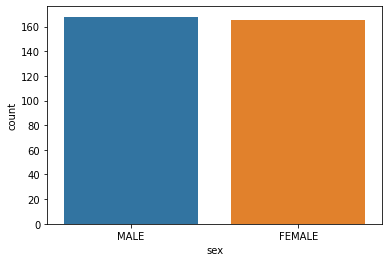

In [11]:
sns.countplot(data = df, x = "sex")
male, female = df["sex"].value_counts()
print("Number of Males: ", male)
print("Number of Females: ", female)
plt.show()

In [12]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

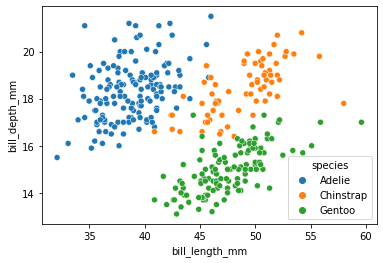

In [13]:
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", data = df, hue = "species")
plt.show()

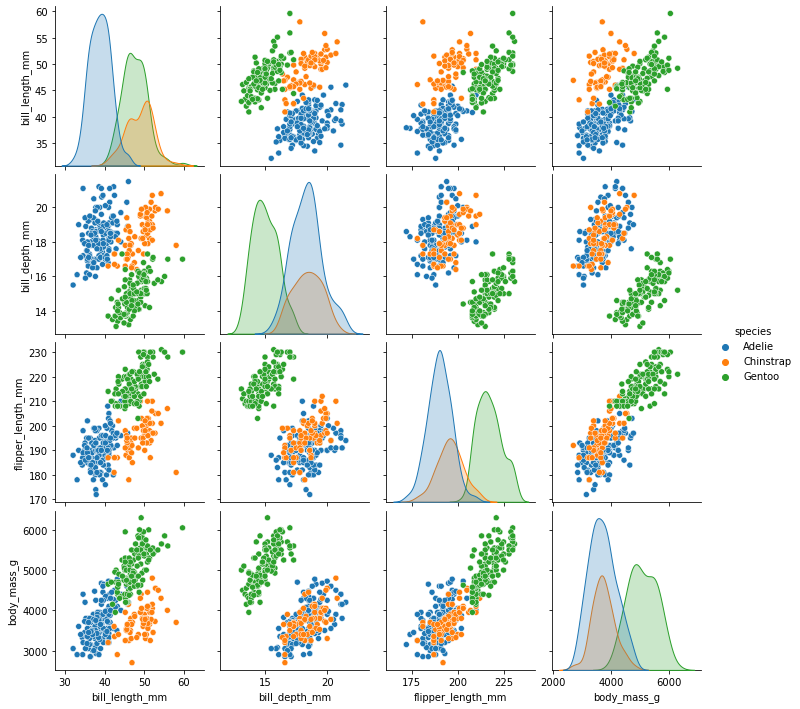

In [14]:
sns.pairplot(data = df, hue = "species")
plt.show()

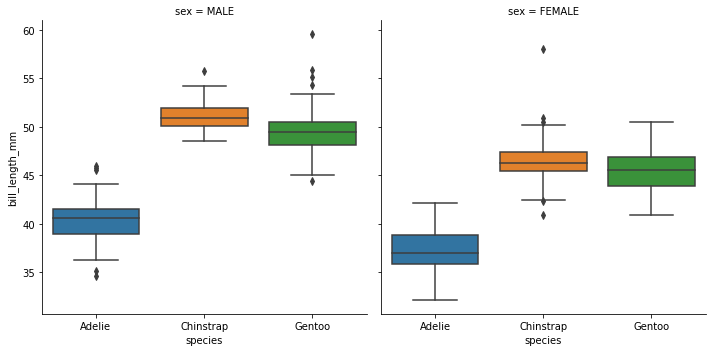

In [15]:
sns.catplot(data = df, x = "species", y = "bill_length_mm", kind = "box", col = "sex")
plt.show()

In [17]:
pd.get_dummies(df.drop("species", axis = 1), drop_first = True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Training the model

In [16]:
X = pd.get_dummies(df.drop("species", axis = 1), drop_first = True)
y = df["species"]

In [17]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [18]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Testing the model and checking the accuracy

In [21]:
base_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Accuracy Score: ", accuracy_score(y_test, base_pred))

Accuracy Score:  0.9552238805970149


In [23]:
print("Confusion Matrix\n", confusion_matrix(y_test, base_pred))

Confusion Matrix
 [[30  1  0]
 [ 1 15  0]
 [ 1  0 19]]


C:\Users\adity\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


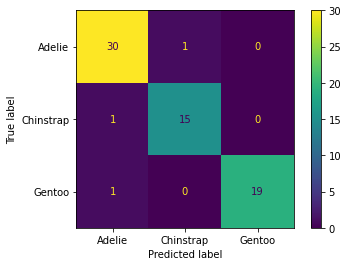

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

In [25]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



In [26]:
model.feature_importances_

array([0.35128085, 0.04724943, 0.56819371, 0.        , 0.03327601,
       0.        , 0.        ])

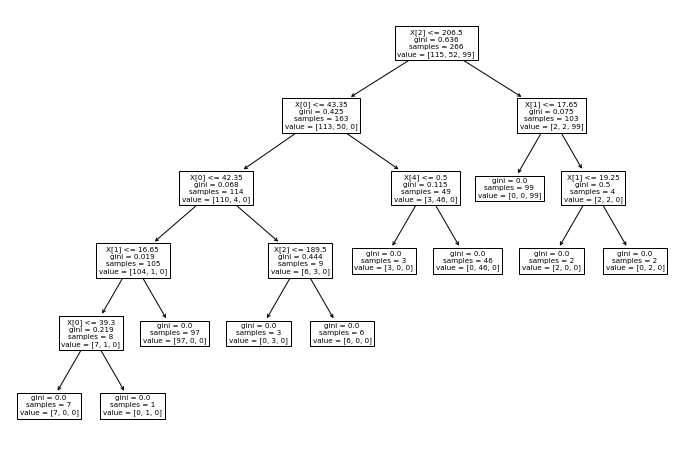

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize = (12, 8))
plot_tree(model)
plt.show()

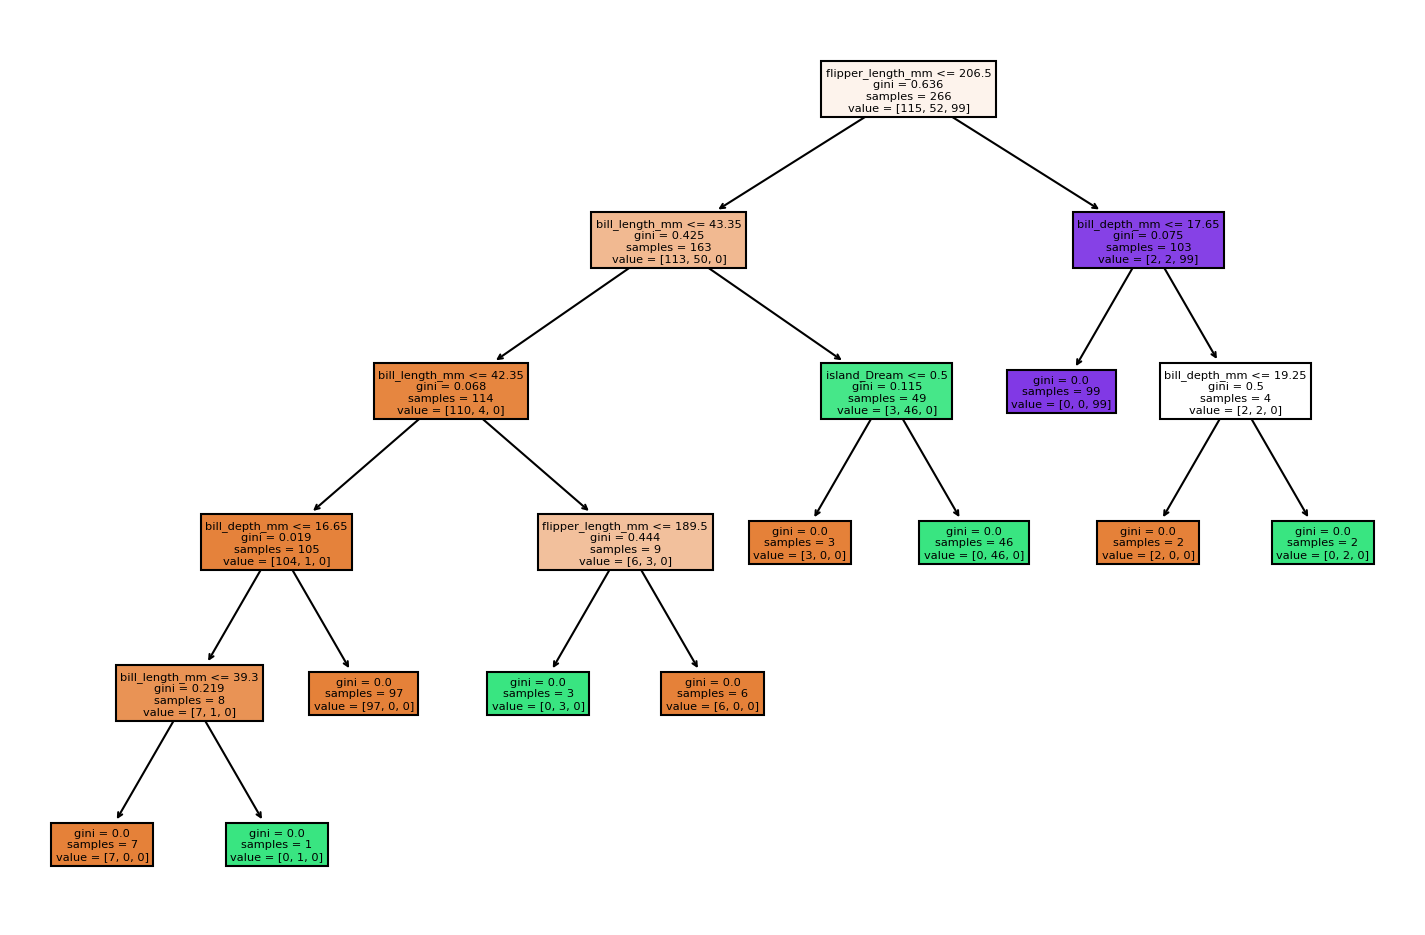

In [29]:
plt.figure(figsize = (12, 8), dpi = 150)
plot_tree(model, filled = True, feature_names = X.columns)
plt.show()

## Pruning the Decision Tree

In [30]:
pruned_tree = DecisionTreeClassifier(max_depth = 2)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.88      0.97      0.92        31
   Chinstrap       0.86      0.75      0.80        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.91        67
   macro avg       0.91      0.89      0.90        67
weighted avg       0.91      0.91      0.91        67





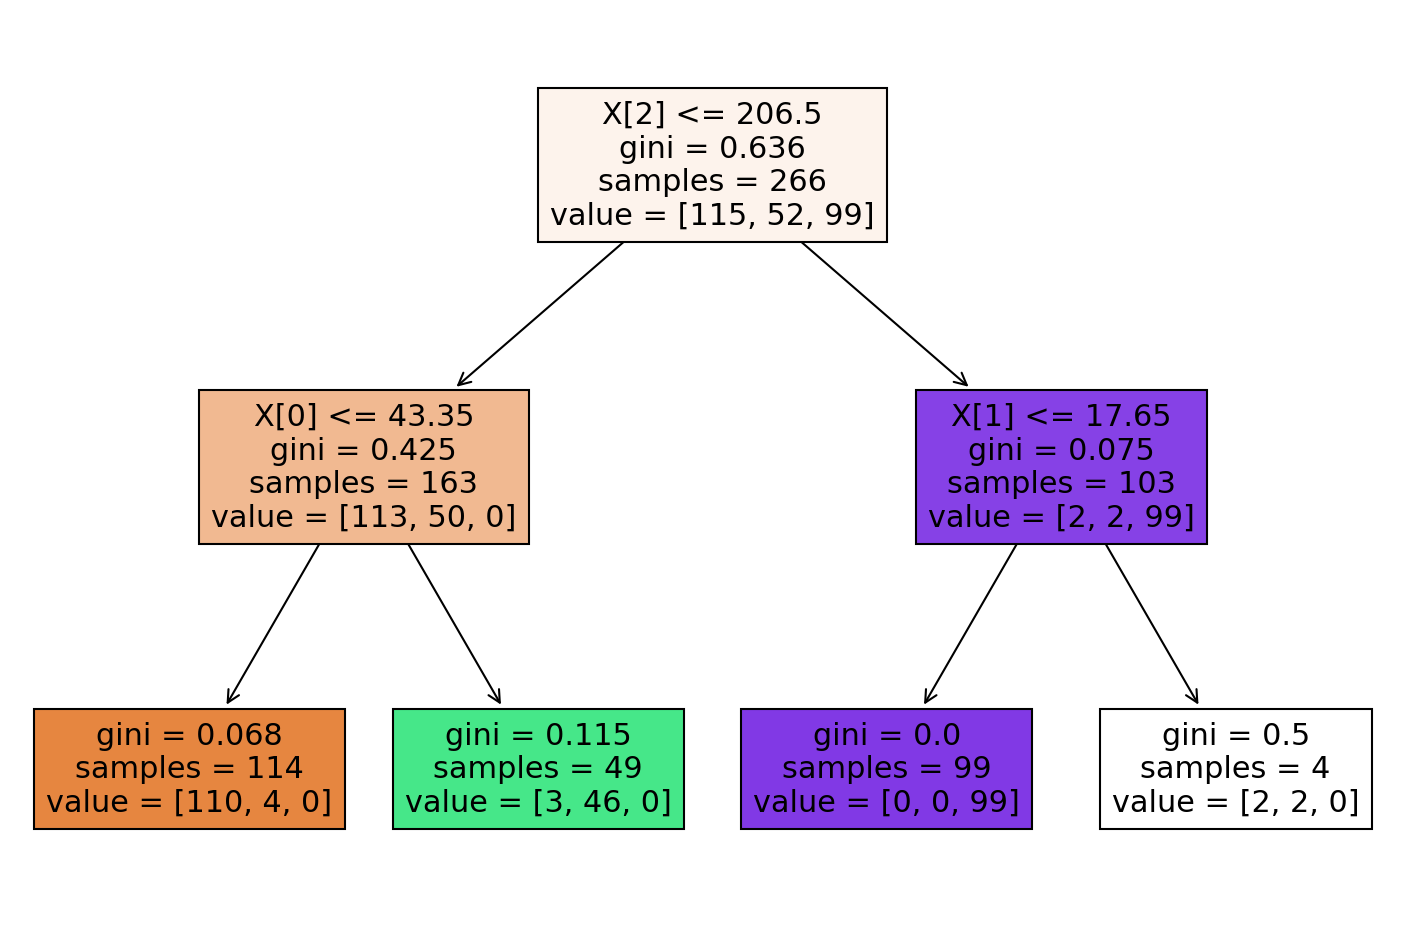

In [31]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print("\n")
    plt.figure(figsize = (12, 8), dpi = 150)
    plot_tree(model, filled = True)
    pass

report_model(pruned_tree)